### DGP1:
$$
y = -2D + 3D\cdot \mathbf{1}(x_1>0) + D\cdot \mathbf{1} (x_2>0)+ D \cdot \mathbf{1} (x_1>0)\mathbf{1} (x_2>0) + x_3 + x_4 + x_5 + e
$$

$$
ATE(..|x_1 >=0, x_2>=0) = 3\\
ATE(..|x_1 >=0, x_2<0) = 1\\
ATE(..|x_1 <0, x_2>=0) = -1\\
ATE(..|x_1 <0, x_2<0) = -2\\
$$

<img src="ate4_tree.png">,

In [28]:
# interaction as well
    #interaction of indicator functions
    
# data driven MC?
    #DGP like a real world problem?
    

### DGP2:
$$
y = -5D + 6D\cdot \mathbf{1}(x_1>0) + 2.5D\cdot \mathbf{1} (x_2>0) + 1.5D\cdot \mathbf{1} (x_3>0) + x_4 + x_5 + e
$$

$$
\: \: \:\: \: \: \:\: \:\: \: \:x_3 > 0    \: \: \:  \: \: \: \:\: \: \:\:\: \:\:\: \: \: \:\:\: \: \: \: \: \:\:\: \:\: \: \: \:\:\:\: \: \: \: \:\:\: \: \:\:              x_3 < 0\\
$$
$$ATE =
\begin{vmatrix} 
& x_2 >0 & x_2<0 \\
x_1>0 & 5 & 2.5\\
x_1<0 & -1 & -3.5
\end{vmatrix} \: \: \: \:\:\: \: \: \:\:
\begin{vmatrix} 
& x_2 >0 & x_2<0 \\
x_1>0 & 3.5 & 1\\
x_1<0 & -2.5 & -5
\end{vmatrix}
$$

#### Notes:
* without treatment, the expected outcome is constant 0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def dgp6(n, var_e):
    np.random.seed()
    #treatment (randomly assigned)
    d = np.random.choice([0, 1], size=(n,1), p=[1./2, 1./2])
    #covariates (relevate to T.E.)
    x1 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    x2 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    #covariates (relevant to outcome)
    x3 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    x4 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    x5 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    #covariates (irrelevant)
    x6 = np.random.normal(loc = 0.0, scale = 1.0, size = (n,1))
    #error term
    e = np.random.normal(loc = 0.0, scale = var_e, size = (n,1))

    #indicator functions
    ind1 = np.zeros((n,1))
    ind2 = np.zeros((n,1))
    ind1[np.where(x1 >= 0)] = 1
    ind2[np.where(x2 >= 0)] = 1

    y = np.add(np.add(np.add(np.add(np.add(d*-2, np.multiply(np.add(3*ind1, ind2),d)),x3),x4),x5),e)
    X = np.concatenate((x1,x2,x3,x4,x5,x6), axis=1)
    
    x_train, x_test, y_train, y_test, treat_train, treat_test = train_test_split(X, y, d, test_size=0.5)
    
    return x_train, x_test, y_train, y_test, treat_train, treat_test

In [4]:
x_train, x_test, y_train, y_test, treat_train, treat_test = dgp6(10000, 0.01)

x1 = x_test[:,0].reshape(-1,1)
x2 = x_test[:,1].reshape(-1,1)
d = treat_test[:,0].reshape(-1,1)
y = y_test[:,0].reshape(-1,1)
print(np.mean(y[np.where((x1 >= 0) & (x2 >= 0) & (d == 1))]) - np.mean(y[np.where((x1 >= 0) & (x2 >= 0) & (d == 0))]))
print(np.mean(y[np.where((x1 >= 0) & (x2 < 0) & (d == 1))]) - np.mean(y[np.where((x1 >= 0) & (x2 < 0) & (d == 0))]))
print(np.mean(y[np.where((x1 < 0) & (x2 >= 0) & (d == 1))]) - np.mean(y[np.where((x1 < 0) & (x2 >= 0) & (d == 0))]))
print(np.mean(y[np.where((x1 < 0) & (x2 < 0) & (d == 1))]) - np.mean(y[np.where((x1 < 0) & (x2 < 0) & (d == 0))]))

1.9453590827009057
1.1269652921623765
-1.0970205948655147
-2.1131022714166128


### VAR(e) = [0.01, 1.0, 1.5]

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
with open('te4_r2.pkl', 'rb') as f:
    df1 = pkl.load(f)
with open('te4_r3.pkl', 'rb') as f:
    df2 = pkl.load(f)
with open('te4_r4.pkl', 'rb') as f:
    df3 = pkl.load(f)
with open('te4_r5.pkl', 'rb') as f:
    df4 = pkl.load(f)

print(df1[0])
a1 = df1[1]
print(df2[0])
a2 = df2[1]
print(df3[0])
a3 = df3[1]
print(df4[0])
a4 = df4[1]
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

TE4, n = 1000, reps = 700, eps = 0.01, test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
TE4, n = 1000, reps = 700, eps = 1.0, test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
TE4, n = 1000, reps = 700, eps = 1.5, test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
TE4, n = 1000, reps = 700, eps = 2.5, test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [20]:
t1 = np.ones(8)

In [13]:
a1[0]

array([1.58530482, 1.55195698, 1.54550176, 1.45326343, 1.47000683,
       1.39423171, 1.27760954, 0.90458242])

<AxesSubplot:title={'center':'n = 1000, MC reps = 500'}>

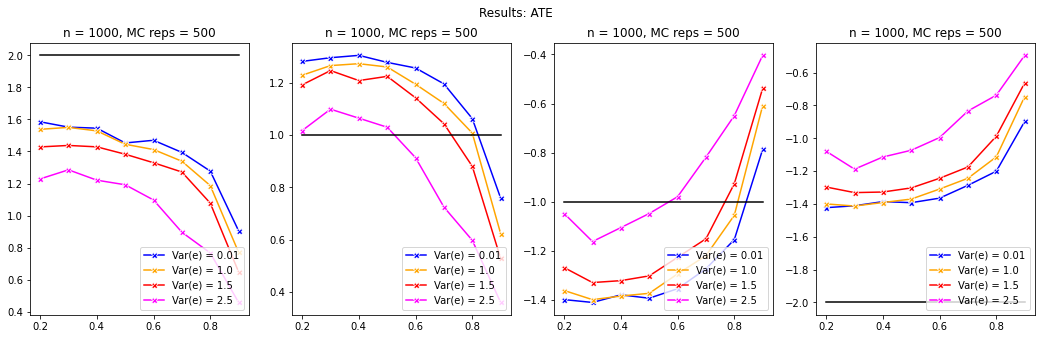

In [25]:
fig, axes = plt.subplots(1,4, figsize=(18, 5))
fig.suptitle('Results: ATE')


#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
for i in range(4):
    sns.lineplot(ax=axes[i], x=test_sizes, y=a1[i],  marker='X', dashes = True, color = 'Blue')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a2[i],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a3[i],  marker='X', dashes = True, color = 'Red')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a4[i],  marker='X', dashes = True, color = 'Magenta')

    axes[i].legend(['Var(e) = 0.01', 'Var(e) = 1.0', 'Var(e) = 1.5', 'Var(e) = 2.5'], loc='lower right')
    axes[i].title.set_text('n = 1000, MC reps = 500')

sns.lineplot(ax=axes[0], x=test_sizes, y=t1*2, dashes = True, color = 'Black')
sns.lineplot(ax=axes[1], x=test_sizes, y=t1, dashes = True, color = 'Black')
sns.lineplot(ax=axes[2], x=test_sizes, y=t1*-1, dashes = True, color = 'Black')
sns.lineplot(ax=axes[3], x=test_sizes, y=t1*-2, dashes = True, color = 'Black')

#axes[0].set(xlabel='Estimation Sample Proportion', ylabel='MSE (ATE)')
#axes[1].set(xlabel='Estimation Sample Proportion', ylabel='MSE (ATE)')

#fig.savefig("mseate.png")

In [29]:
#bias in first and last cases

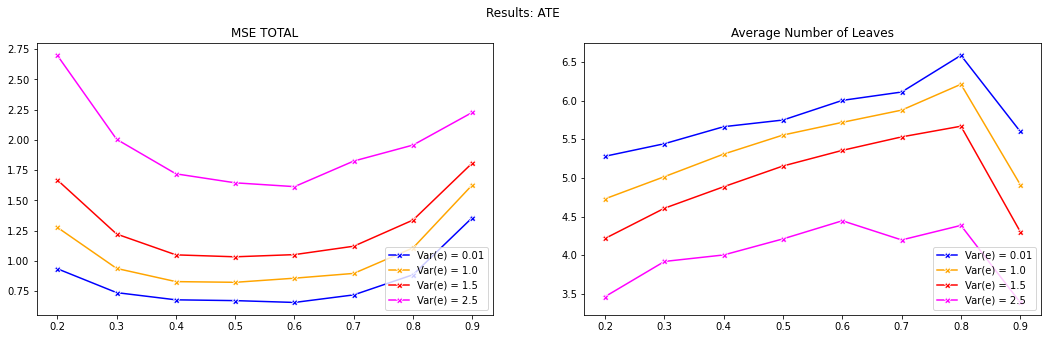

In [26]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
fig.suptitle('Results: ATE')


#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
for i in range(2):
    sns.lineplot(ax=axes[i], x=test_sizes, y=a1[i+4],  marker='X', dashes = True, color = 'Blue')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a2[i+4],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a3[i+4],  marker='X', dashes = True, color = 'Red')
    sns.lineplot(ax=axes[i], x=test_sizes, y=a4[i+4],  marker='X', dashes = True, color = 'Magenta')

    axes[i].legend(['Var(e) = 0.01', 'Var(e) = 1.0', 'Var(e) = 1.5', 'Var(e) = 2.5'], loc='lower right')
axes[0].title.set_text('MSE TOTAL')
axes[1].title.set_text('Average Number of Leaves')



#axes[0].set(xlabel='Estimation Sample Proportion', ylabel='MSE (ATE)')
#axes[1].set(xlabel='Estimation Sample Proportion', ylabel='MSE (ATE)')

#fig.savefig("mseate.png")

In [32]:
#why overfitting when var(e) is small

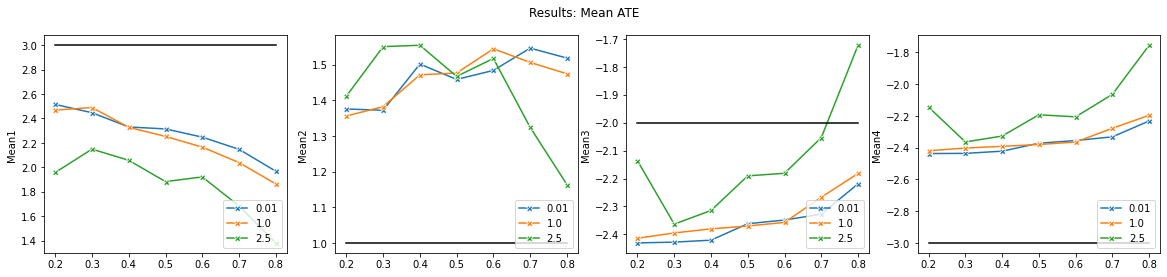

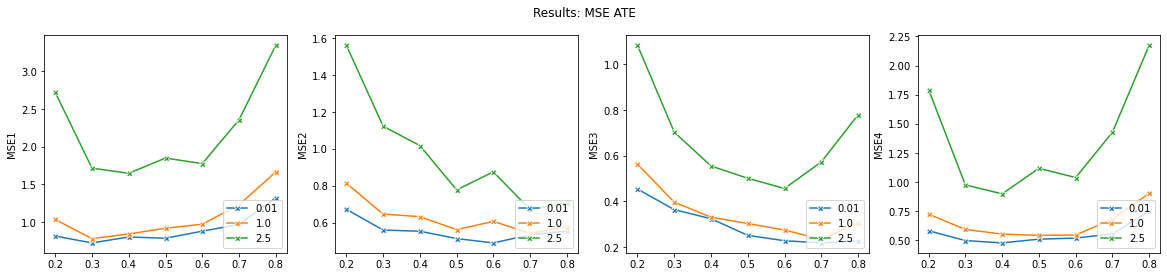

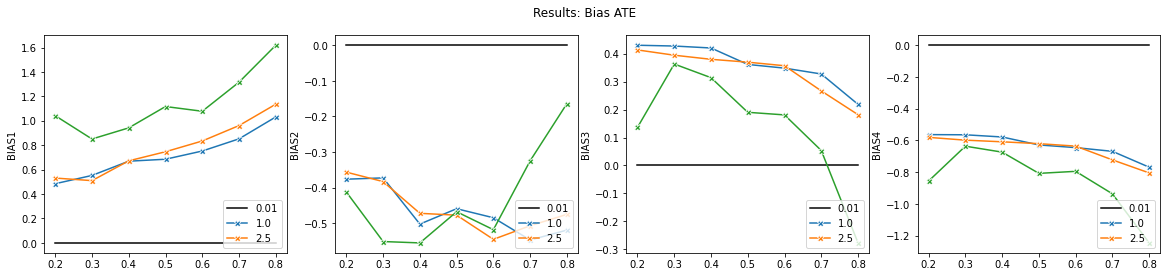

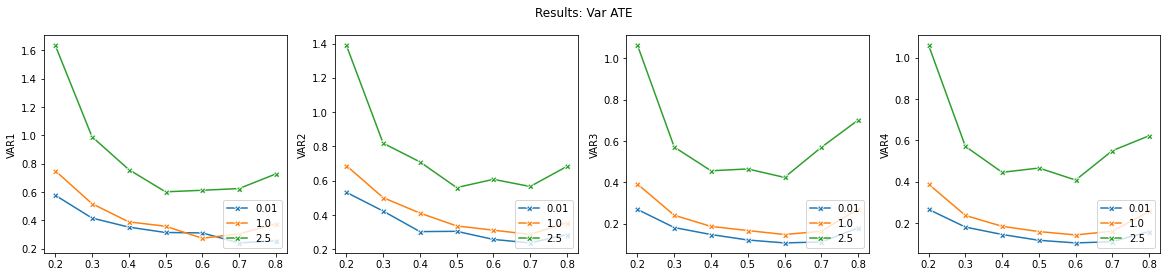

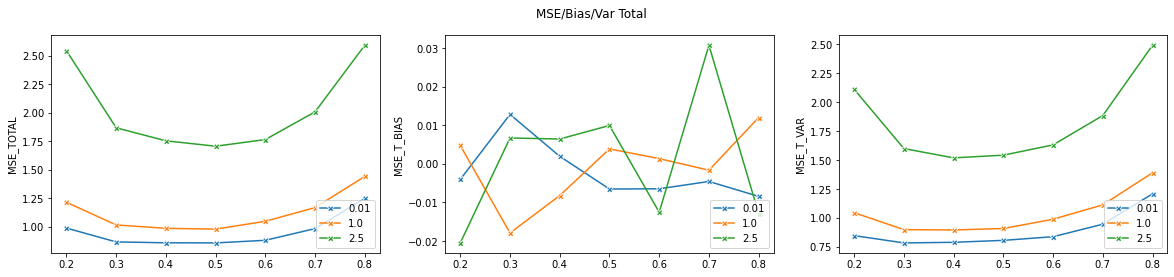

In [21]:
with open('ate4_001.pkl', 'rb') as f:
    df1 = pkl.load(f)
with open('ate_10.pkl', 'rb') as f:
    df2 = pkl.load(f)
with open('ate_25.pkl', 'rb') as f:
    df3 = pkl.load(f)

A = [[df1],[df2],[df3]]
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

fig, axes = plt.subplots(1,4, figsize=(20, 4))
fig.suptitle('Results: Mean ATE')
for i in range(4):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')
sns.lineplot(ax=axes[0], x=test_sizes, y=np.ones(len(test_sizes))*3, dashes = True, color = 'Black')
sns.lineplot(ax=axes[1], x=test_sizes, y=np.ones(len(test_sizes))*1, dashes = True, color = 'Black')
sns.lineplot(ax=axes[2], x=test_sizes, y=np.ones(len(test_sizes))*-2, dashes = True, color = 'Black')
sns.lineplot(ax=axes[3], x=test_sizes, y=np.ones(len(test_sizes))*-3, dashes = True, color = 'Black')

fig, axes = plt.subplots(1,4, figsize=(20, 4))
fig.suptitle('Results: MSE ATE')
for i in range(4):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i+4],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')

fig, axes = plt.subplots(1,4, figsize=(20, 4))
fig.suptitle('Results: Bias ATE')
for i in range(4):
    sns.lineplot(ax=axes[i], x=test_sizes, y=np.ones(len(test_sizes))*0, dashes = True, color = 'Black')
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i+8],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')
        

fig, axes = plt.subplots(1,4, figsize=(20, 4))
fig.suptitle('Results: Var ATE')
for i in range(4):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i+12],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')
        
fig, axes = plt.subplots(1,3, figsize=(20, 4))
fig.suptitle('MSE/Bias/Var Total')
for i in range(3):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i+16],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')


In [2]:
with open('te5_r1.pkl', 'rb') as f:
    df1 = pkl.load(f)
with open('te5_r1_.pkl', 'rb') as f:
    df2 = pkl.load(f)
with open('te5_r2_.pkl', 'rb') as f:
    df3 = pkl.load(f)
with open('te5_r2.pkl', 'rb') as f:
    df4 = pkl.load(f)
with open('te5_r3.pkl', 'rb') as f:
    df5 = pkl.load(f)
with open('te5_r4.pkl', 'rb') as f:
    df6 = pkl.load(f)
print(df1[0])
a1 = df1[1:]
print(df2[0])
a2 = df2[1:]
print(df3[0])
a3 = df3[1:]
print(df4[0])
a4 = df4[1:]
print(df5[0])
a5 = df5[1:]
print(df6[0])
a6 = df6[1:]
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

['var = 0.01, reps = 500, n = 1000, with int.']
['var = 0.1, reps = 500, n = 1000, with int.']
['var = 0.5, reps = 500, n = 1000, with int.']
['var = 1.0, reps = 500, n = 1000, with int.']
['var = 0.01, reps = 500, n = 1000, with int.']
['var = 5.0, reps = 500, n = 1000, with int.']


In [8]:
a5[4]

[array([2.40437925, 1.80401593, 1.65842266, 1.47465006, 1.68647483,
        1.74136284, 2.17886532, 2.73231247])]

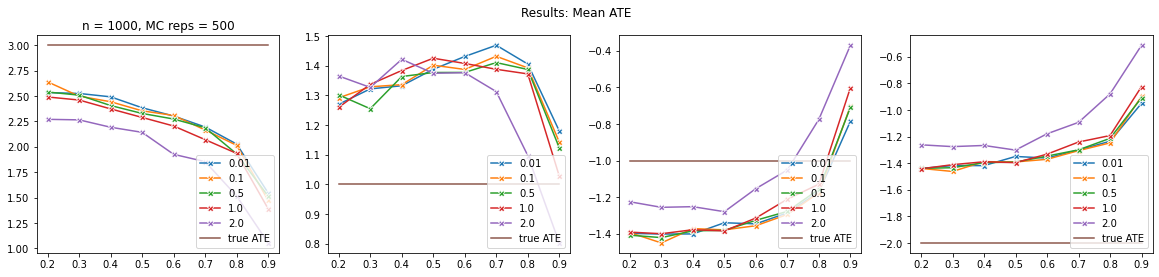

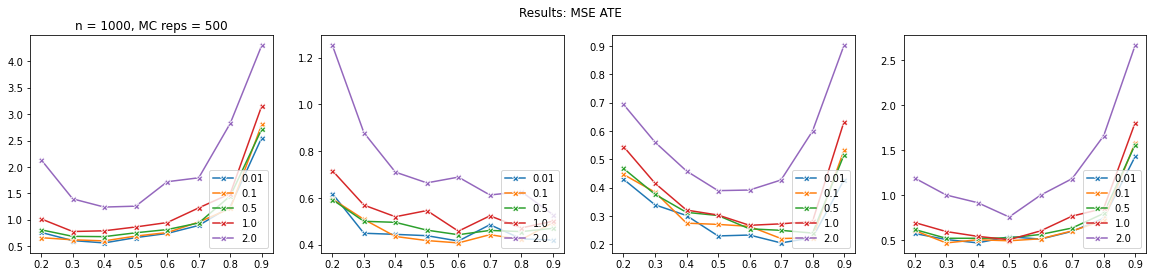

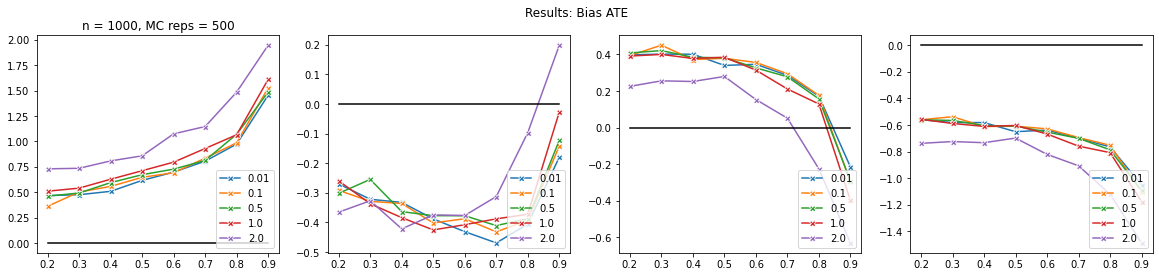

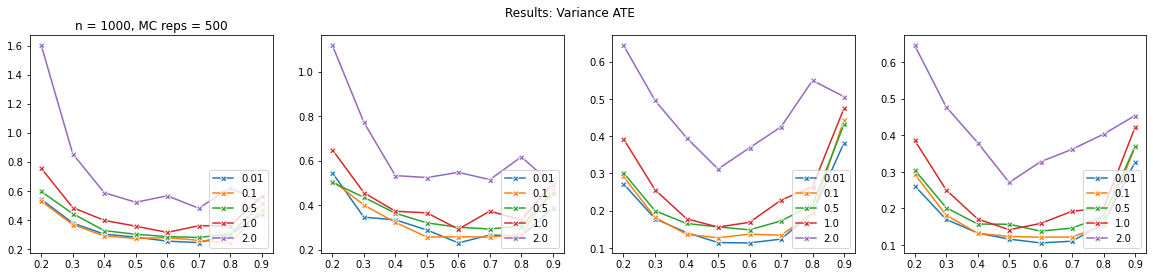

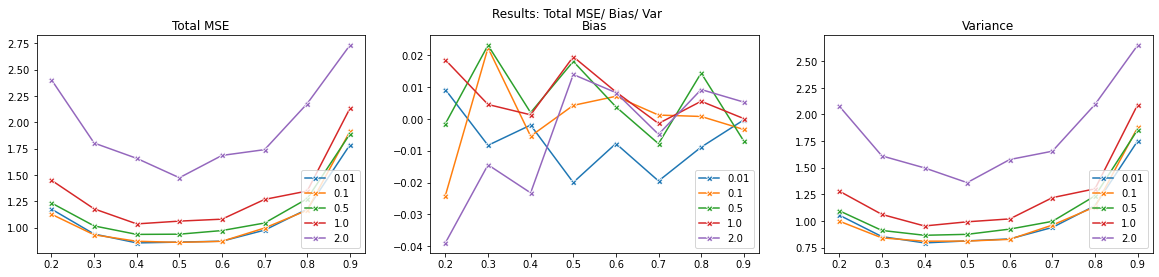

In [9]:
A = [[a1],[a2],[a3],[a4],[a5]]
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
fig, axes = plt.subplots(1,4, figsize=(20, 4))
fig.suptitle('Results: Mean ATE')
for a in A:
    at = a[0][0][0].reshape(8,4).transpose()
#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[0], x=test_sizes, y=at[0],  marker='X', dashes = True)
    sns.lineplot(ax=axes[1], x=test_sizes, y=at[1],  marker='X', dashes = True)
    sns.lineplot(ax=axes[2], x=test_sizes, y=at[2],  marker='X', dashes = True)
    sns.lineplot(ax=axes[3], x=test_sizes, y=at[3],  marker='X', dashes = True)
sns.lineplot(ax=axes[0], x=test_sizes, y=np.ones(len(test_sizes))*3, dashes = True)
sns.lineplot(ax=axes[1], x=test_sizes, y=np.ones(len(test_sizes))*1, dashes = True)
sns.lineplot(ax=axes[2], x=test_sizes, y=np.ones(len(test_sizes))*-1, dashes = True)
sns.lineplot(ax=axes[3], x=test_sizes, y=np.ones(len(test_sizes))*-2, dashes = True)
for a in A:
    for i in range(4):
        axes[i].legend(['0.01', '0.1', '0.5', '1.0', '2.0', 'true ATE'], loc='lower right')
    axes[0].title.set_text('n = 1000, MC reps = 500')
    
fig, axes = plt.subplots(1,4, figsize=(20, 4))
fig.suptitle('Results: MSE ATE')
for a in A:
    at = a[0][1][0].reshape(8,4).transpose()
#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[0], x=test_sizes, y=at[0],  marker='X', dashes = True)
    sns.lineplot(ax=axes[1], x=test_sizes, y=at[1],  marker='X', dashes = True)
    sns.lineplot(ax=axes[2], x=test_sizes, y=at[2],  marker='X', dashes = True)
    sns.lineplot(ax=axes[3], x=test_sizes, y=at[3],  marker='X', dashes = True)
    for i in range(4):
        axes[i].legend(['0.01', '0.1', '0.5', '1.0', '2.0'], loc='lower right')
    axes[0].title.set_text('n = 1000, MC reps = 500')

fig, axes = plt.subplots(1,4, figsize=(20, 4))
fig.suptitle('Results: Bias ATE')
for a in A:
    at = a[0][2][0].reshape(8,4).transpose()
#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[0], x=test_sizes, y=at[0],  marker='X', dashes = True)
    sns.lineplot(ax=axes[1], x=test_sizes, y=at[1],  marker='X', dashes = True)
    sns.lineplot(ax=axes[2], x=test_sizes, y=at[2],  marker='X', dashes = True)
    sns.lineplot(ax=axes[3], x=test_sizes, y=at[3],  marker='X', dashes = True)
for i in range(4):
    axes[i].legend(['0.01', '0.1', '0.5', '1.0', '2.0'], loc='lower right')
    sns.lineplot(ax=axes[i], x=test_sizes, y=np.ones(len(test_sizes))*0, dashes = True, color = 'Black')

    axes[0].title.set_text('n = 1000, MC reps = 500')
    
fig, axes = plt.subplots(1,4, figsize=(20, 4))
fig.suptitle('Results: Variance ATE')
for a in A:
    at = a[0][3][0].reshape(8,4).transpose()
#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[0], x=test_sizes, y=at[0],  marker='X', dashes = True)
    sns.lineplot(ax=axes[1], x=test_sizes, y=at[1],  marker='X', dashes = True)
    sns.lineplot(ax=axes[2], x=test_sizes, y=at[2],  marker='X', dashes = True)
    sns.lineplot(ax=axes[3], x=test_sizes, y=at[3],  marker='X', dashes = True)
    for i in range(4):
        axes[i].legend(['0.01', '0.1', '0.5', '1.0', '2.0'], loc='lower right')
    axes[0].title.set_text('n = 1000, MC reps = 500')

fig, axes = plt.subplots(1,3, figsize=(20, 4))
fig.suptitle('Results: Total MSE/ Bias/ Var')
for a in A:
    at1 = a[0][4][0]
    at2 = a[0][5][0]
    at3 = a[0][6][0]
#sns.lineplot(ax=axes[0], x=test_sizes, y=df9['MSE1'],  marker='X', dashes = True, color = 'Orange')
    sns.lineplot(ax=axes[0], x=test_sizes, y=at1,  marker='X', dashes = True)
    sns.lineplot(ax=axes[1], x=test_sizes, y=at2,  marker='X', dashes = True)
    sns.lineplot(ax=axes[2], x=test_sizes, y=at3,  marker='X', dashes = True)
    for i in range(3):
        axes[i].legend(['0.01', '0.1', '0.5', '1.0', '2.0'], loc='lower right')
    axes[0].title.set_text('Total MSE')
    axes[1].title.set_text('Bias')
    axes[2].title.set_text('Variance')


In [11]:
with open('ate2_001.pkl', 'rb') as f:
    df1 = pkl.load(f)
with open('ate2_10.pkl', 'rb') as f:
    df2 = pkl.load(f)
with open('ate2_25.pkl', 'rb') as f:
    df3 = pkl.load(f)
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [10]:
df3

,Mean1,Mean2,MSE1,MSE2,BIAS1,BIAS2,VAR1,VAR2,MSE_TOTAL,MSE_T_BIAS,MSE_T_VAR
0,,,,,,,,,,,
0.2,1.128877,-1.098614,1.409726,1.147491,0.371123,-0.401386,1.271993,0.986381,1.929231,-0.016868,1.553924
0.3,1.107417,-1.101823,0.948051,0.919917,0.392583,-0.398177,0.793930,0.761372,1.445938,-0.002907,1.217448
0.4,1.146190,-1.160550,0.717424,0.623791,0.353810,-0.339450,0.592243,0.508565,1.209701,0.007808,1.010891
0.5,1.146466,-1.100070,0.590431,0.629525,0.353534,-0.399930,0.465445,0.469581,1.080813,-0.023756,0.925219
0.6,1.040978,-1.094778,0.655466,0.589768,0.459022,-0.405222,0.444765,0.425562,1.063513,0.027054,0.941365
0.7,0.898642,-0.891517,0.856343,0.874154,0.601358,-0.608483,0.494711,0.503902,1.324526,-0.002322,1.212417
0.8,0.686036,-0.728173,1.113990,1.016346,0.813964,-0.771827,0.451453,0.420628,1.498229,0.023073,1.404291
0.9,0.395111,-0.393102,1.576853,1.583611,1.104889,-1.106898,0.356074,0.358388,1.930272,-0.001094,1.844646


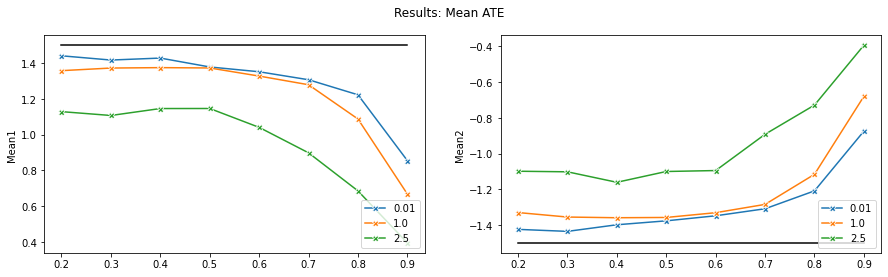

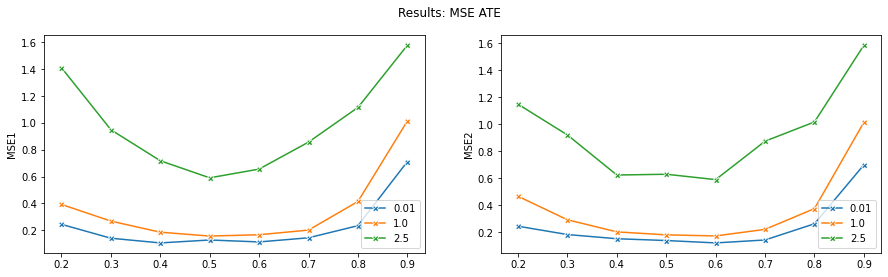

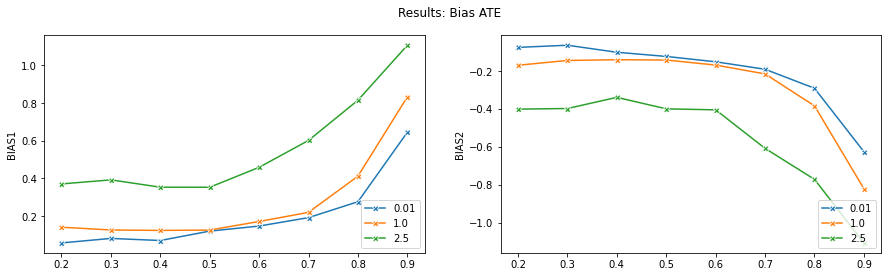

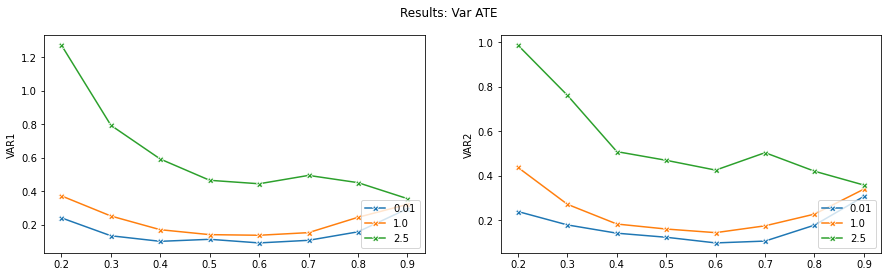

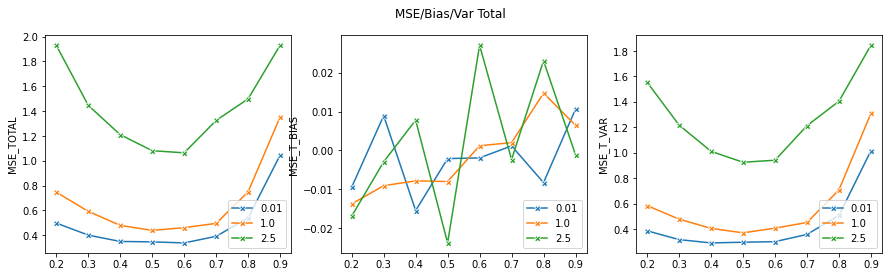

In [12]:
A = [[df1],[df2],[df3]]

fig, axes = plt.subplots(1,2, figsize=(15, 4))
fig.suptitle('Results: Mean ATE')
for i in range(2):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')
sns.lineplot(ax=axes[0], x=test_sizes, y=np.ones(len(test_sizes))*1.5, dashes = True, color = 'Black')
sns.lineplot(ax=axes[1], x=test_sizes, y=np.ones(len(test_sizes))*-1.5, dashes = True, color = 'Black')

fig, axes = plt.subplots(1,2, figsize=(15, 4))
fig.suptitle('Results: MSE ATE')
for i in range(2):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i+2],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')

fig, axes = plt.subplots(1,2, figsize=(15, 4))
fig.suptitle('Results: Bias ATE')
for i in range(2):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i+4],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')

fig, axes = plt.subplots(1,2, figsize=(15, 4))
fig.suptitle('Results: Var ATE')
for i in range(2):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i+6],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')
        
fig, axes = plt.subplots(1,3, figsize=(15, 4))
fig.suptitle('MSE/Bias/Var Total')
for i in range(3):
    for a in A:
        sns.lineplot(ax=axes[i], x=test_sizes, y=a[0].iloc[:,i+8],  marker='X', dashes = True)
        axes[i].legend(['0.01', '1.0', '2.5'], loc='lower right')
